In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import chart_studio.plotly as py 
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import os


import warnings        

warnings.filterwarnings("ignore") 
plt.style.use('ggplot') 


In [2]:
aerial = pd.read_csv("operations.csv",low_memory=False)
weather_station_location = pd.read_csv("Weather Station Locations.csv",low_memory=False)
weather = pd.read_csv("Summary of Weather.csv",low_memory=False)

In [3]:
aerial = aerial[pd.isna(aerial.Country)==False]
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"]  
aerial = aerial[ aerial.iloc[:,9]!=1355]

In [4]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Ta

In [5]:
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [6]:
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


# 1. Graph for Countries

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


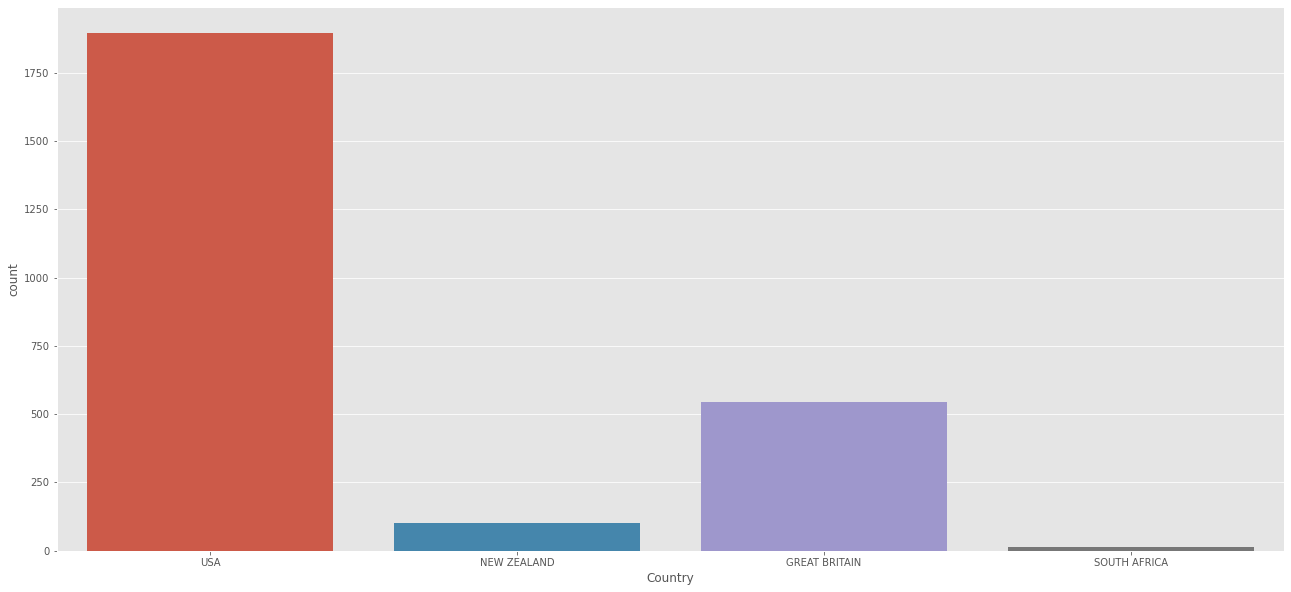

In [7]:
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

#  2.Graph for Target Countries

ITALY                         1104
BURMA                          335
LIBYA                          272
TUNISIA                        113
GREECE                          87
EGYPT                           80
JAPAN                           71
CHINA                           52
SICILY                          46
GERMANY                         41
SOLOMON ISLANDS                 37
CRETE                           30
BISMARK ARCHIPELAGO             29
INDONESIA                       28
ETHIOPIA                        27
ERITREA                         21
PANTELLARIA                     20
BALI                            19
PHILIPPINE ISLANDS              19
THAILAND OR SIAM                16
FRENCH INDO CHINA               10
ANDAMAN ISLANDS                  8
SUDAN                            7
GILBERT ISLANDS                  6
NEW GUINEA                       4
BOUGAINVILLE                     3
FORMOSA AND RYUKYU ISLANDS       3
FRANCE                           3
SOMALIA             

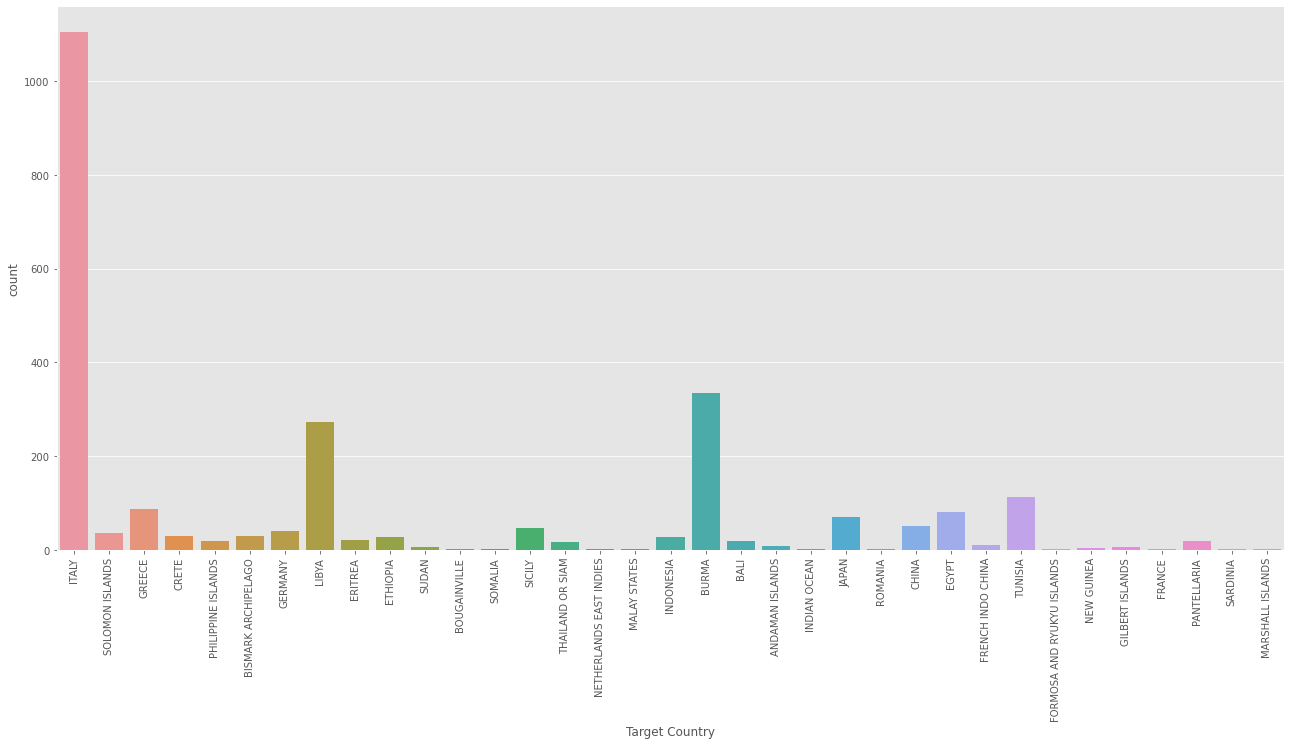

In [8]:
print(aerial['Target Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

# 3. Graph for Aircraft Series

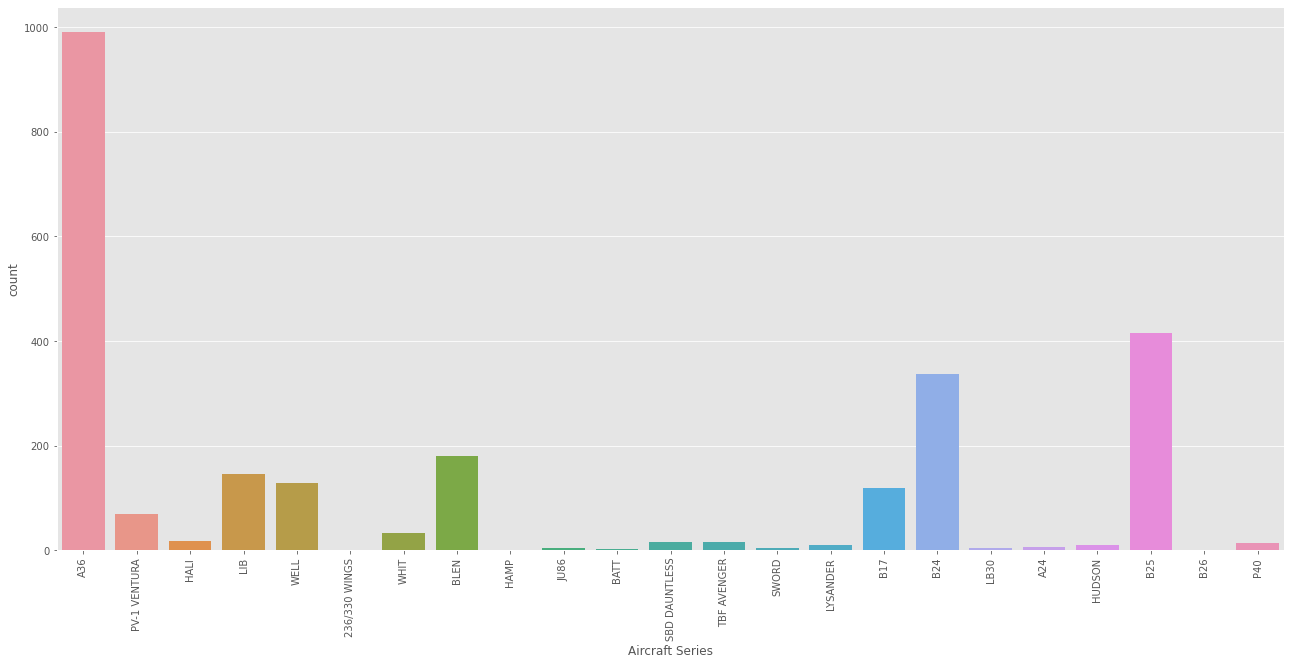

In [9]:
data = aerial['Aircraft Series'].value_counts()
plt.figure(figsize=(22,10))
sns.countplot(aerial['Aircraft Series'])
plt.xticks(rotation=90)
plt.show()

#  4.Graph for Theater of Operations 

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


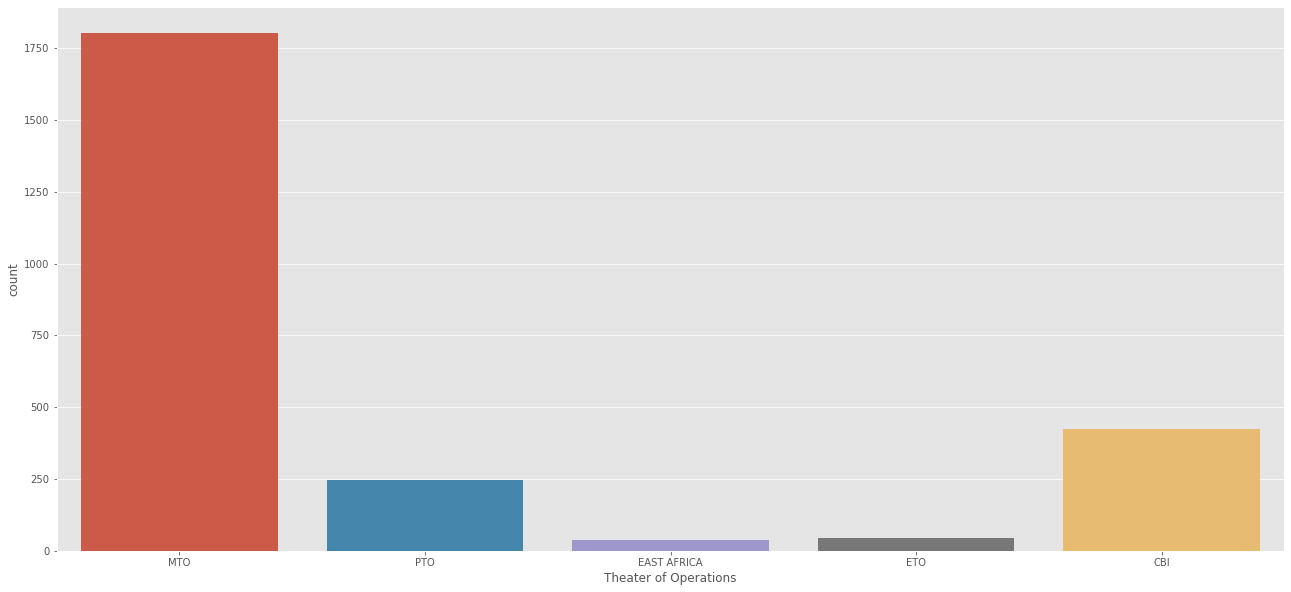

In [10]:
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

Weather Station Locations


#  5.Weather of Bindukuri area

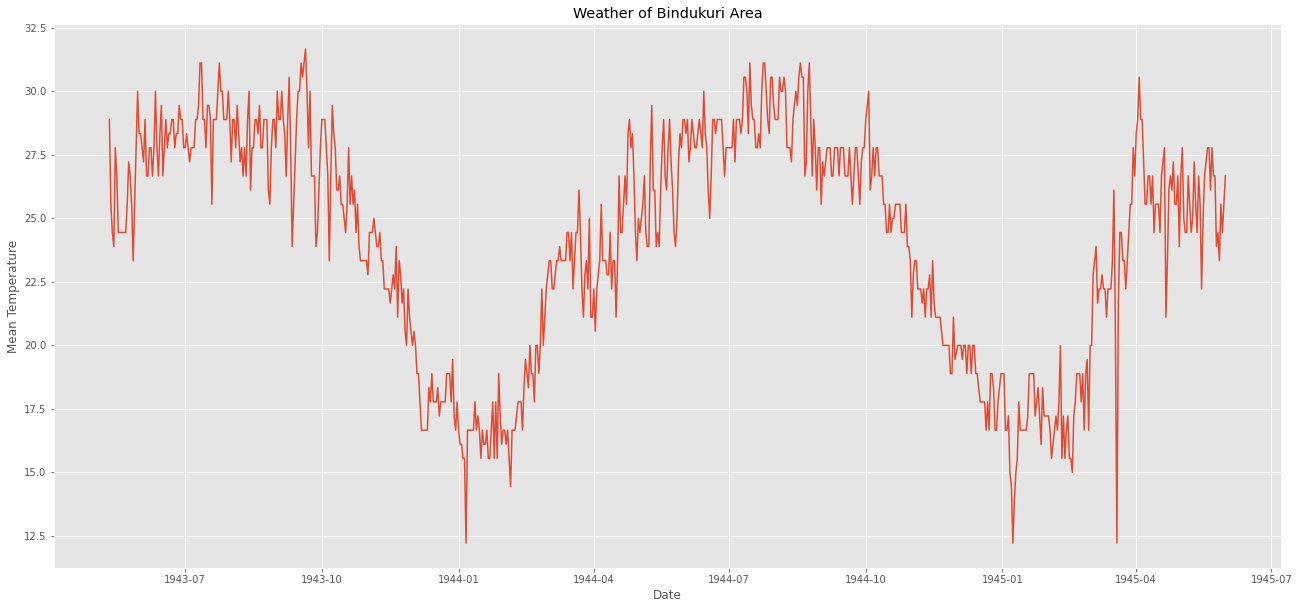

In [11]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Weather of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

#  6.Wban according to index

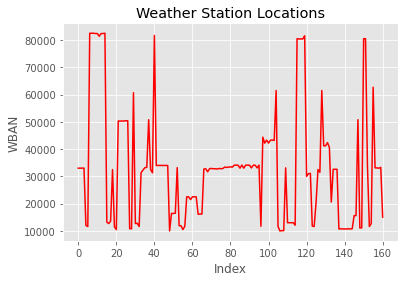

In [12]:
x=weather_station_location['WBAN'].iloc[0:161].values
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_title("Weather Station Locations")
ax.set_xlabel("Index")
ax.set_ylabel("WBAN")
ax.plot(x,c='r',label='WBAN')
plt.show()

#  7.Weather Stations in worldmap

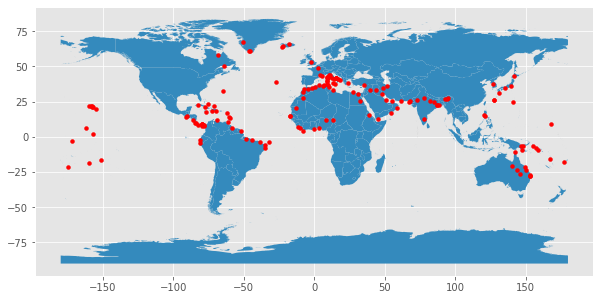

In [13]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv("Weather Station Locations.csv", delimiter=',', low_memory=False)

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file("TM_WORLD_BORDERS-0.3.shp")
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

#  8.Mean temp using Time series 

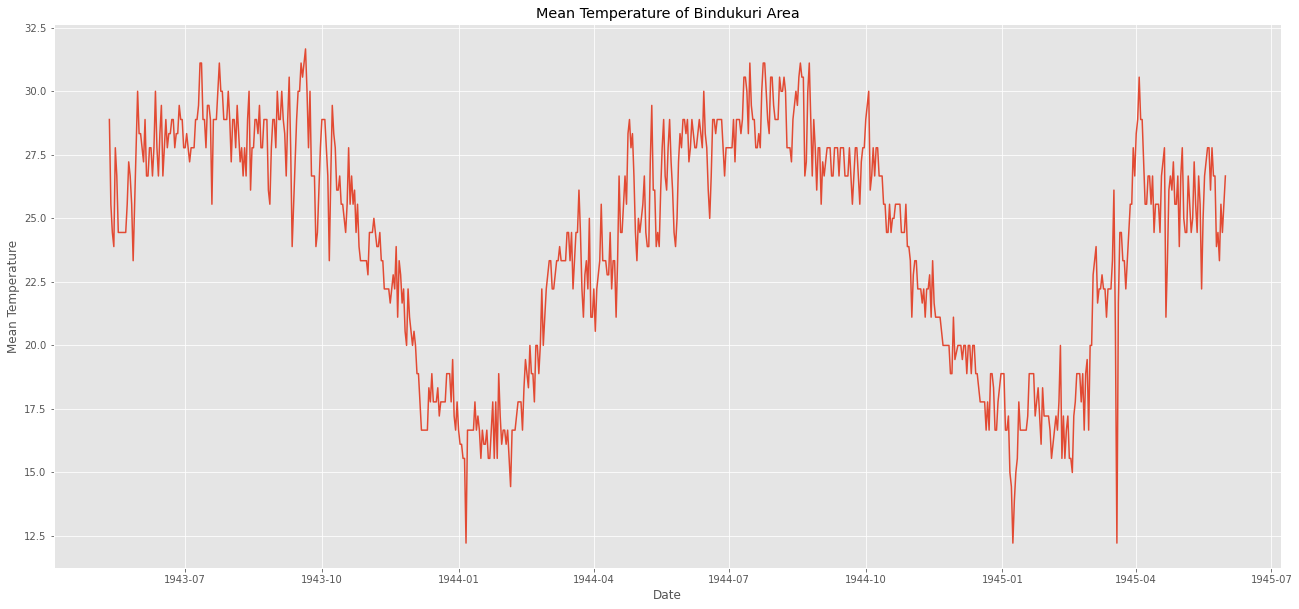

In [14]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


#  9.Takeoff Locations on map

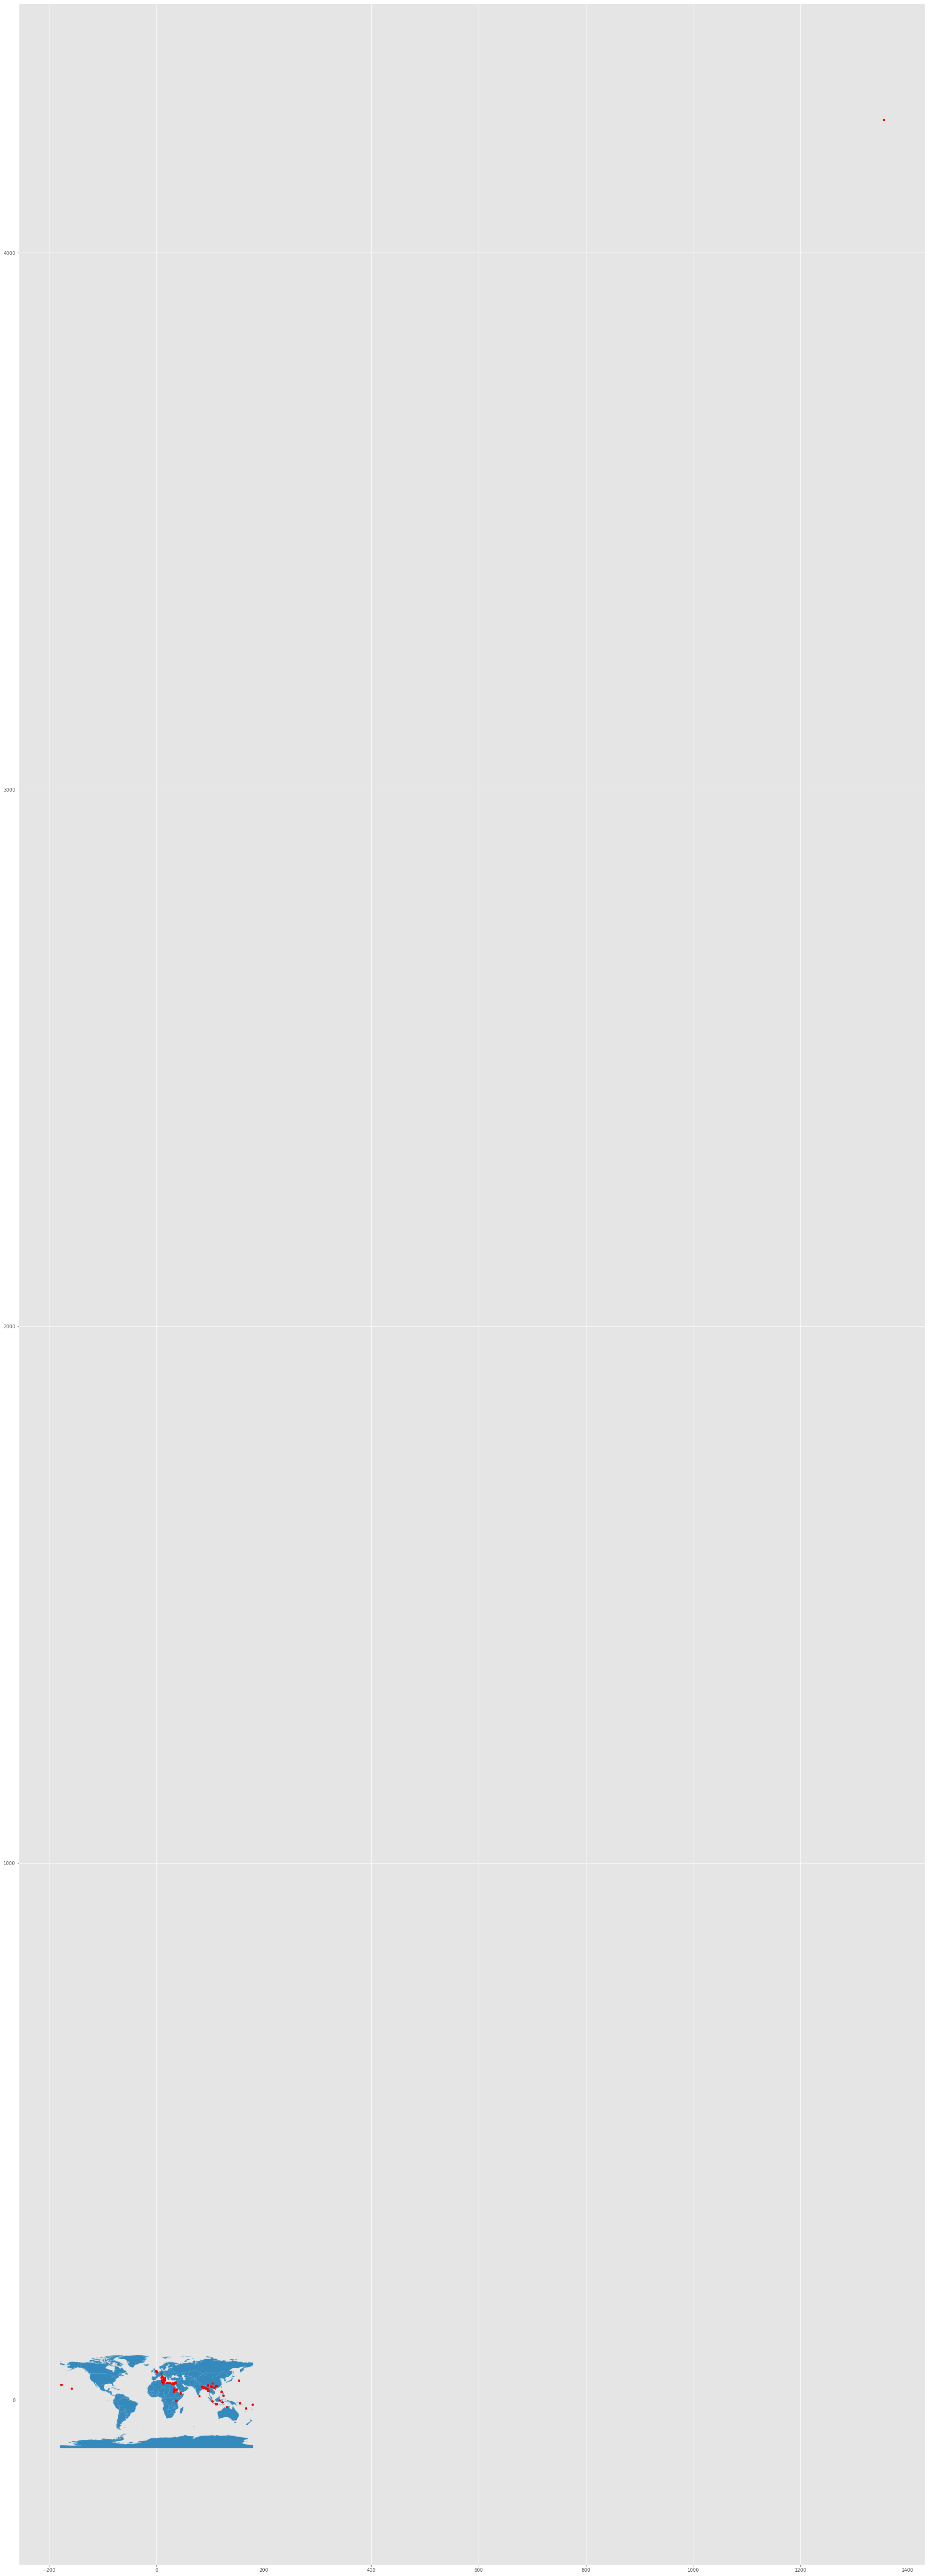

In [15]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("operations.csv", low_memory=False)
df['Takeoff Longitude'] = pd.to_numeric(df['Takeoff Longitude'],errors='coerce')
df['Takeoff Latitude'] = pd.to_numeric(df['Takeoff Latitude'],errors='coerce')
geometry = [Point(xy) for xy in zip(df['Takeoff Longitude'], df['Takeoff Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file("TM_WORLD_BORDERS-0.3.shp")
gdf.plot(ax=world.plot(figsize=(100,100)), marker='o', color='red', markersize=15);

In [16]:
import geopandas
cities=geopandas.read_file("operations.csv",low_memory=False)
cities.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,geometry
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,,,,,,10,,,,None
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,,1,,...,,,,,,20,,,9366,None
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,,,,,,9,,,,None
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,,,PONTE OLIVO AIRFIELD,...,,,,,,7.5,,,,None
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,,1,,...,,,,,,8,,,22585,None


#  10.graph for date and mean temp

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
from plotly.offline import iplot
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df.head()

aerial = pd.read_csv("operations.csv",low_memory=False)
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]


In [19]:
 
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    coun = weather_bin[weather_bin.Date == each]
    liste.append(coun["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = " temperature"
)
layout = dict(title = 'Dates and Mean Temperature ')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)
